# Book Recommendation System

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
#To change directory in google drive
import os

In [3]:
books_dataset = pd.read_csv('books_data.csv')
ratings_dataset = pd.read_csv('Books_rating.csv')

In [7]:
ratings_dataset.shape

(3000000, 10)

In [8]:
ratings_dataset.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [9]:
books_dataset.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

In [10]:
books_dataset.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [ ]:
ratings_dataset.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Data Pre-Processing


In [4]:
# Filter the dataset to include only users with at least 20 reviews
filtered_ratings_dataset = ratings_dataset.groupby('User_id').filter(lambda x: len(x) >= 20)

In [5]:
selected_columns = ['Title', 'User_id', 'review/score', 'review/time']
filtered_ratings_dataset = filtered_ratings_dataset[selected_columns]

In [5]:
filtered_ratings_dataset.shape

(548134, 4)

In [14]:
filtered_ratings_dataset.head(5)

,Title,User_id,review/score,review/time
1,Dr. Seuss: American Icon,A30TK6U7DNS82R,5.0,1095724800
3,Dr. Seuss: American Icon,A2MVUWT453QH61,4.0,1090713600
5,Dr. Seuss: American Icon,A2F6NONFUDB6UK,4.0,1127174400
6,Dr. Seuss: American Icon,A14OJS0VWMOSWO,5.0,1100131200
11,Wonderful Worship in Smaller Churches,A373VVEU6Z9M0N,5.0,1291766400


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encoding for 'User_id', 'Title', and 'categories'
user_encoder = LabelEncoder()
title_encoder = LabelEncoder()

filtered_ratings_dataset['User_id'] = user_encoder.fit_transform(filtered_ratings_dataset['User_id'])
filtered_ratings_dataset['Title'] = title_encoder.fit_transform(filtered_ratings_dataset['Title'])

In [18]:
filtered_ratings_dataset.head(5)

,Title,User_id,review/score,review/time
1,20778,5128,5.0,1095724800
3,20778,4136,4.0,1090713600
5,20778,3562,4.0,1127174400
6,20778,321,5.0,1100131200
11,93849,5561,5.0,1291766400


## Split Data Into Training-Validation-Test Set

In [7]:
# Sort the dataset based on 'review/time'
filtered_ratings_dataset.sort_values('review/time', inplace=True)

# Calculate the indices for splitting
total_rows = len(filtered_ratings_dataset)
train_size = int(0.8 * total_rows)
test_size = int(0.1 * total_rows)

# Split the dataset
train_set = filtered_ratings_dataset.iloc[:train_size]
validation_set = filtered_ratings_dataset.iloc[train_size:(train_size + test_size)]
test_set = filtered_ratings_dataset.iloc[(train_size + test_size):]

## Train Model

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, Concatenate, Flatten
from tensorflow.keras.models import Model

def create_collaborative_filtering_model(embedding_size = 20, dense_size = 128):

    # Get the number of unique users, items, and categories
    num_users = filtered_ratings_dataset['User_id'].nunique()
    num_items = filtered_ratings_dataset['Title'].nunique()

    # Define input layers for user and item IDs
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')

    # Embedding layers
    user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1)(user_input)
    item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size, input_length=1)(item_input)

    # Flatten embeddings
    user_flat = Flatten()(user_embedding)
    item_flat = Flatten()(item_embedding)

    # Concatenate the flattened embeddings
    concatenated_features = Concatenate()([user_flat, item_flat])

    # Dense layer for further processing
    dense_layer = Dense(dense_size, activation='relu')(concatenated_features)

    # Output layer
    output_layer = Dense(1)(dense_layer)

    # Create the model
    model = Model(inputs=[user_input, item_input], outputs=output_layer)
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

### Parameter Tuning

## Test Results

In [10]:
#best model
#BUUU
best_batch_size = 32
best_embedding_size = 30
best_dense_size = 256
num_epochs = 3
model = create_collaborative_filtering_model(best_embedding_size, best_dense_size)
model.fit(
      [
          train_set['User_id'],
          train_set['Title'],
      ],
      train_set['review/score'],
      epochs=num_epochs,
      batch_size = best_batch_size,
      validation_data=(
          [
              validation_set['User_id'],
              validation_set['Title'],
          ],
          validation_set['review/score']
      )
  )


Epoch 1/3


2023-12-25 23:16:36.343700: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


13704/13704 [==============================] - 88s 6ms/step - loss: 0.8190 - val_loss: 0.9990
Epoch 2/3
13704/13704 [==============================] - 87s 6ms/step - loss: 0.5740 - val_loss: 1.0302
Epoch 3/3
13704/13704 [==============================] - 86s 6ms/step - loss: 0.4663 - val_loss: 1.0831


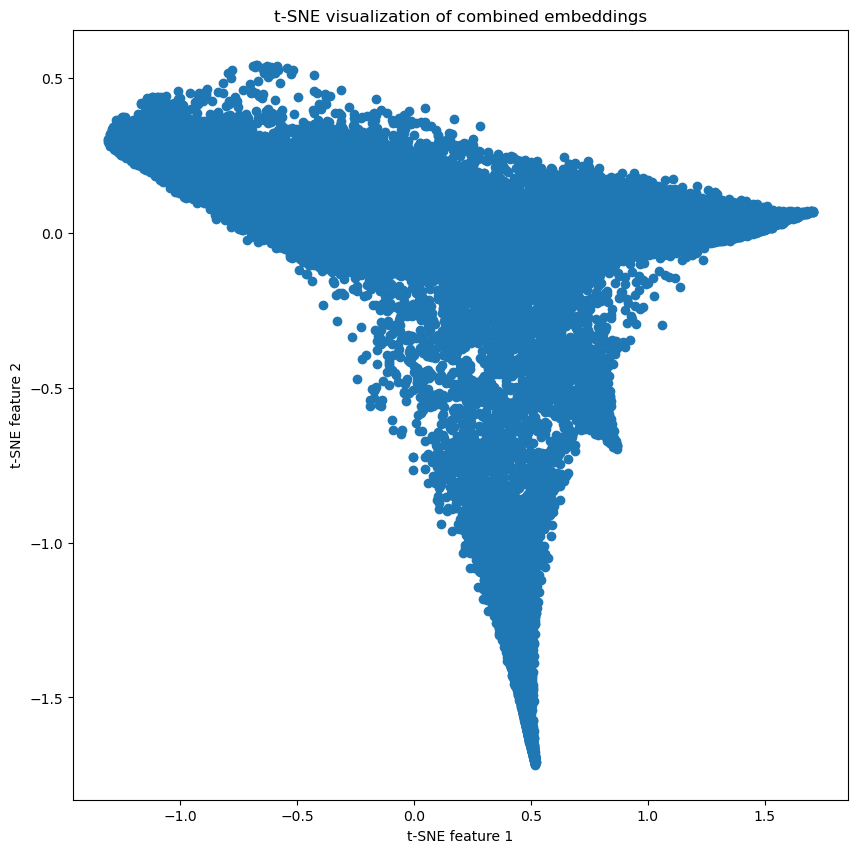

In [12]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


user_embeddings = model.layers[2].get_weights()[0]  # Layer 2: user embeddings
item_embeddings = model.layers[3].get_weights()[0]  # Layer 3: item embeddings

combined_embeddings = np.concatenate((user_embeddings, item_embeddings), axis=0)

tsne = TSNE(n_components = 2, random_state = 42, n_iter=250, perplexity=80)
reduced_embeddings = tsne.fit_transform(combined_embeddings)

# Plotting the results
plt.figure(figsize=(10, 10))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title("t-SNE visualization of combined embeddings")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.show()
